# Import Libraries & Functions


In [1]:
!pip install missingno

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import missingno as msno 

import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)


In [3]:
df = pd.read_csv('../cleaned_df.csv')
df['month'] = df['date'].apply(lambda x: x[5:7])

# df = (df.drop(['id', 'date'], axis=1)).astype(int)

# CLEANING EXPLORING (Visuals)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 20 columns):
id               17965 non-null int64
date             17965 non-null object
price            17965 non-null float64
bedrooms         17965 non-null int64
bathrooms        17965 non-null float64
sqft_living      17965 non-null int64
sqft_lot         17965 non-null int64
floors           17965 non-null float64
condition        17965 non-null int64
grade            17965 non-null int64
sqft_above       17965 non-null int64
sqft_basement    17965 non-null float64
yr_built         17965 non-null int64
yr_renovated     17965 non-null int64
zipcode          17965 non-null int64
lat              17965 non-null float64
long             17965 non-null float64
sqft_living15    17965 non-null int64
sqft_lot15       17965 non-null int64
month            17965 non-null object
dtypes: float64(6), int64(12), object(2)
memory usage: 2.7+ MB


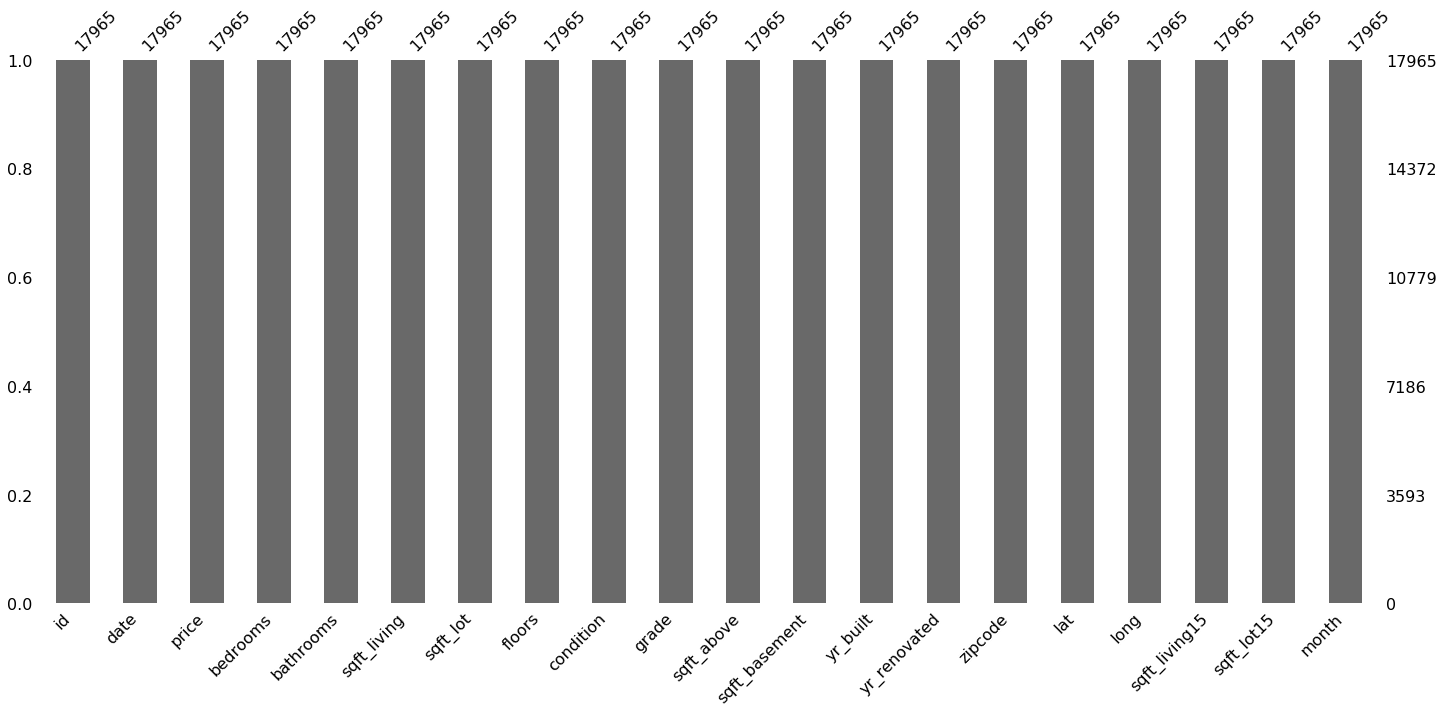

In [5]:
msno.bar(df) 

# Question 1 (Visuals) zipcodes/floors/months

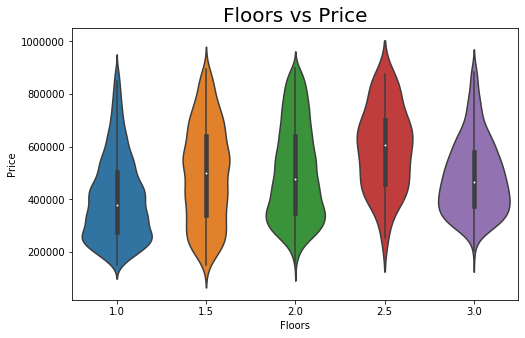

In [7]:
plt.figure(figsize=(8,5))
sns.violinplot(x='floors', y='price', data=df)
plt.title('Floors vs Price' , fontsize=20)
plt.xlabel('Floors')
plt.ylabel("Price")
plt.show()

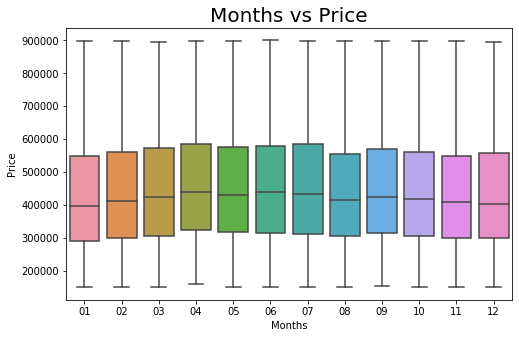

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='month', y='price', data=df)
plt.title('Months vs Price', fontsize=20)
plt.xlabel('Months')
plt.ylabel('Price')
plt.show()

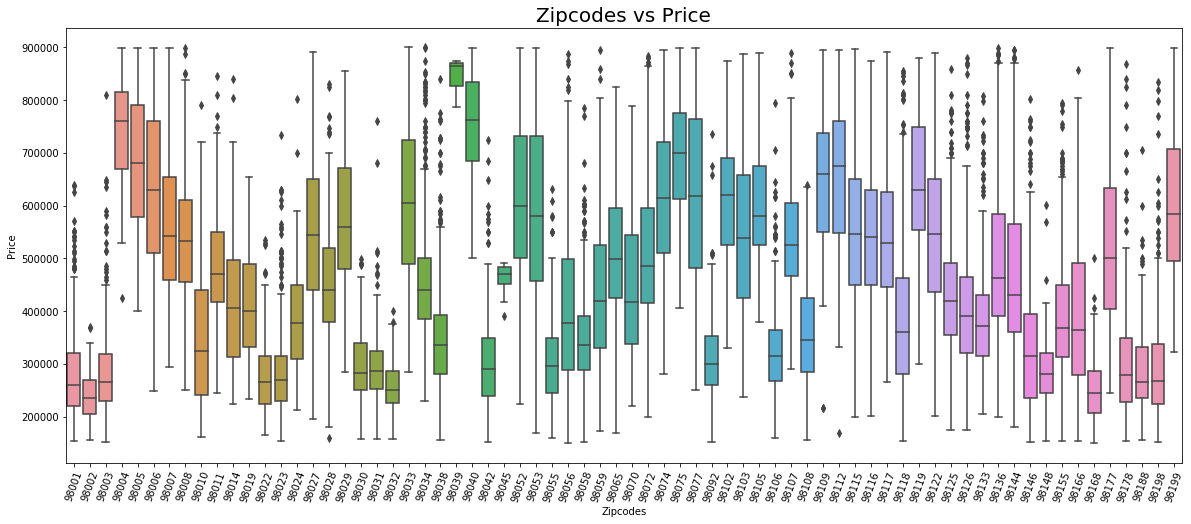

In [9]:

plt.figure(figsize=(20,8))
sns.boxplot(x='zipcode', y='price', data=df)
plt.title('Zipcodes vs Price', fontsize=20)
plt.xticks(rotation=70)
plt.xlabel('Zipcodes')
plt.ylabel('Price')
plt.show()

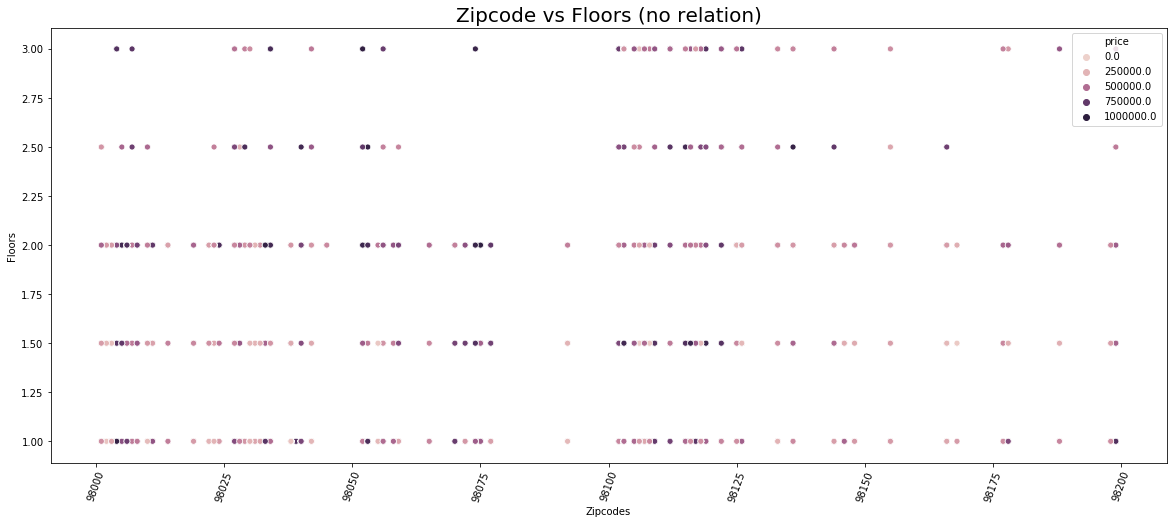

In [34]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='zipcode', y='floors', data=df, hue='price')
plt.title('Zipcode vs Floors (no relation)', fontsize=20)
plt.xlabel("Zipcodes")
plt.ylabel('Floors')
plt.xticks(rotation=70)
plt.show()

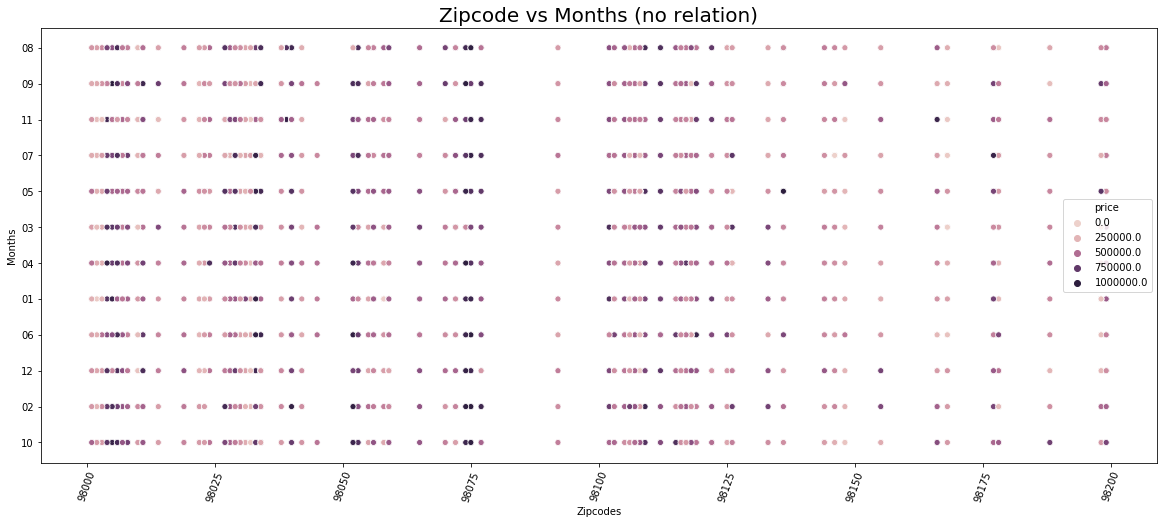

In [36]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='zipcode', y='month', data=df, hue='price')
plt.title('Zipcode vs Months (no relation)', fontsize=20)
plt.xlabel("Zipcodes")
plt.ylabel('Months')
plt.xticks(rotation=70)
plt.show()

<Figure size 1440x576 with 0 Axes>

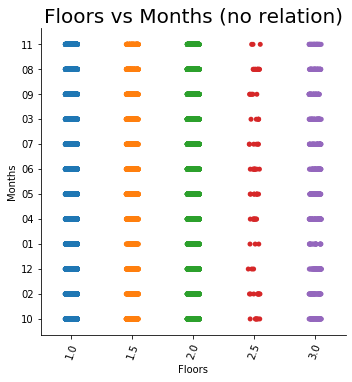

In [38]:
plt.figure(figsize=(20,8))
sns.catplot(x='floors', y='month', data=df)
plt.title('Floors vs Months (no relation)', fontsize=20)
plt.xlabel("Floors")
plt.ylabel('Months')
plt.xticks(rotation=70)
plt.show()

# Question 2 (Visuals) grade/ numb bedrooms

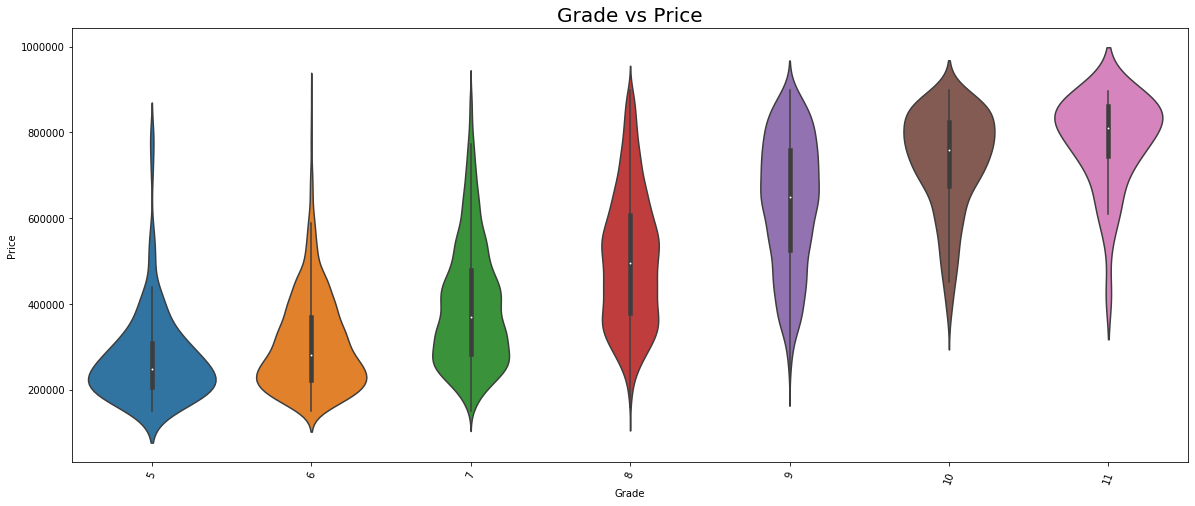

In [13]:
plt.figure(figsize=(20,8))
sns.violinplot(x='grade', y='price', data=df)
plt.title('Grade vs Price', fontsize=20)
plt.xlabel("Grade")
plt.ylabel('Price')
plt.xticks(rotation=70)
plt.show()

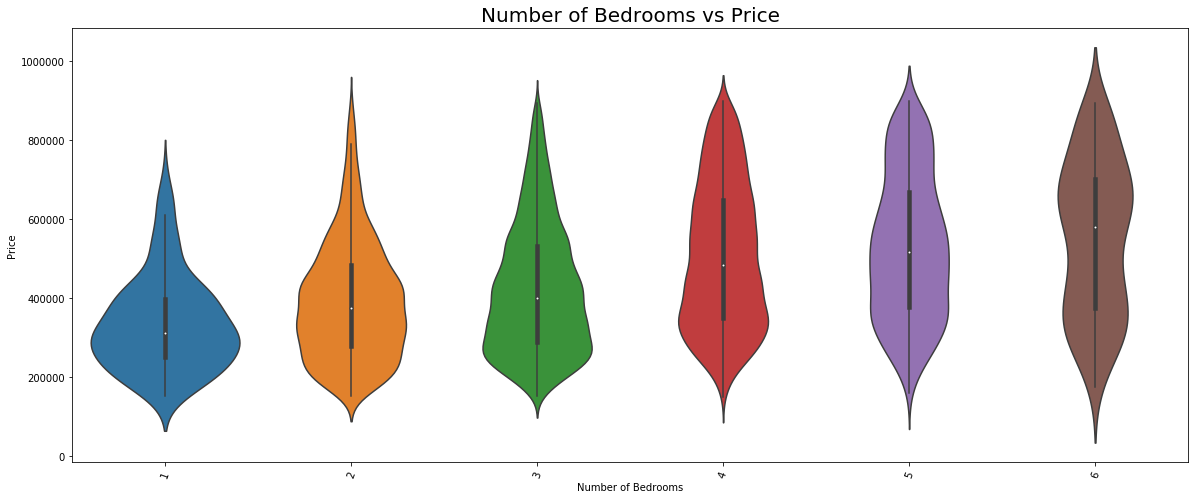

In [14]:
plt.figure(figsize=(20,8))
sns.violinplot(x='bedrooms', y='price', data=df)
plt.title('Number of Bedrooms vs Price', fontsize=20)
plt.xlabel("Number of Bedrooms")
plt.ylabel('Price')
plt.xticks(rotation=70)
plt.show()

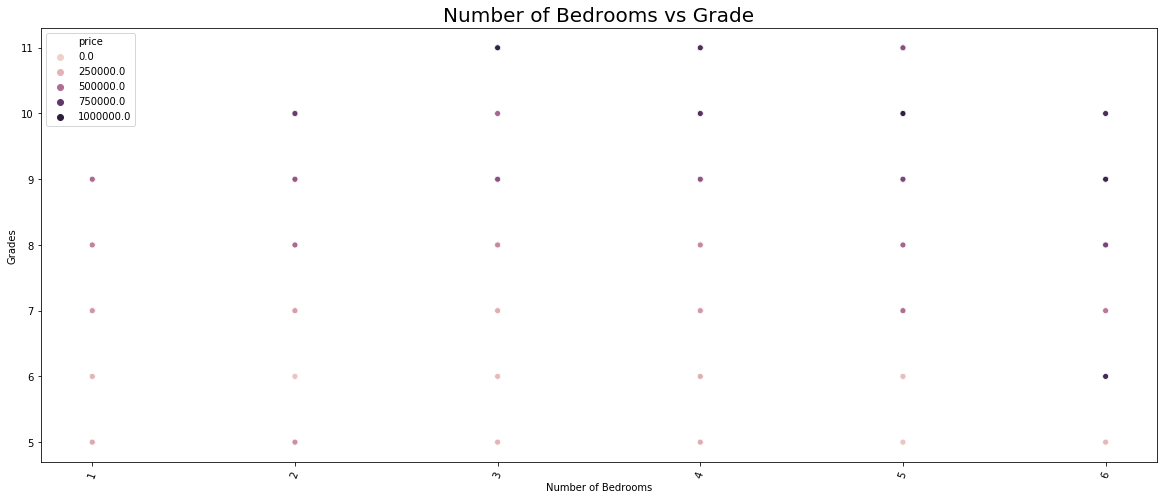

In [33]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='bedrooms', y='grade', data=df, hue='price')
plt.title('Number of Bedrooms vs Grade', fontsize=20)
plt.xlabel("Number of Bedrooms")
plt.ylabel('Grades')
plt.xticks(rotation=70)
plt.show()

# Question 3 (Visuals) sqft_above/sqft_basement

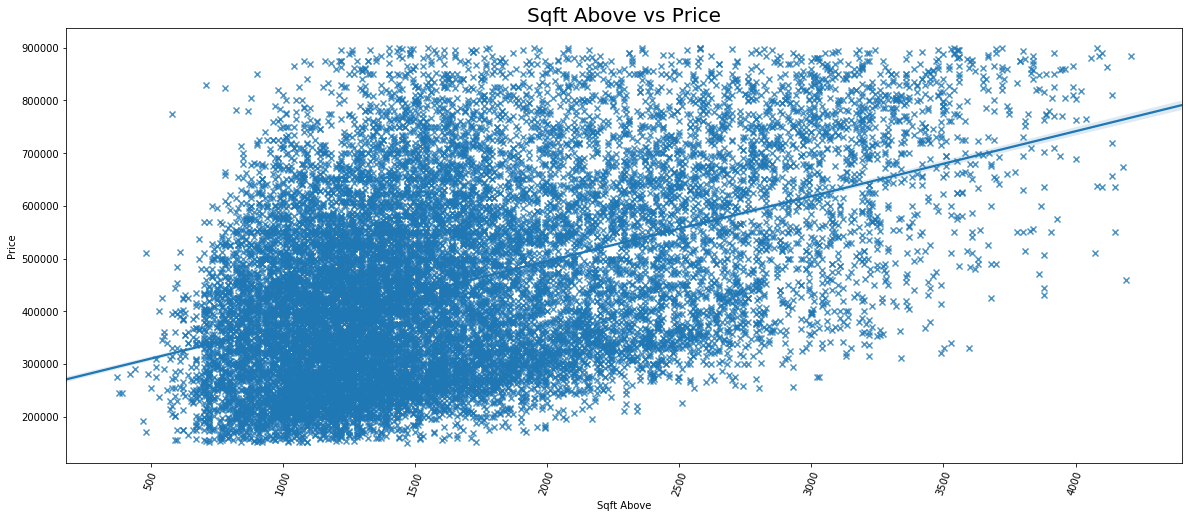

In [48]:
plt.figure(figsize=(20,8))
sns.regplot(x='sqft_above', y='price', data=df, marker='x')
plt.title('Sqft Above vs Price', fontsize=20)
plt.xlabel("Sqft Above")
plt.ylabel('Price')
plt.xticks(rotation=70)
plt.show()

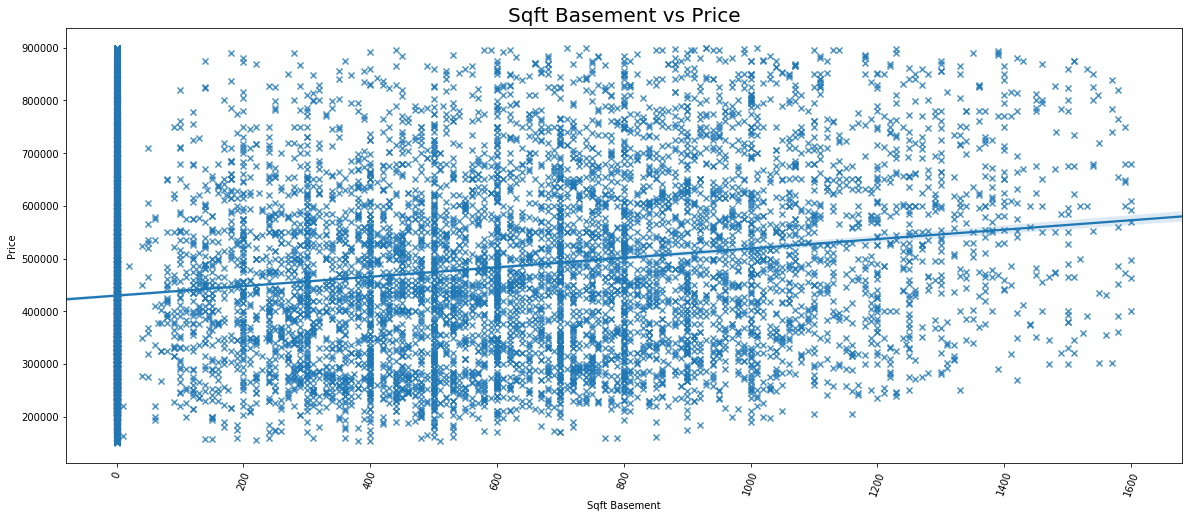

In [24]:
plt.figure(figsize=(20,8))
sns.regplot(x='sqft_basement', y='price', data=df, marker='x')
plt.title('Sqft Basement vs Price', fontsize=20)
plt.xlabel("Sqft Basement")
plt.ylabel('Price')
plt.xticks(rotation=70)
plt.show()

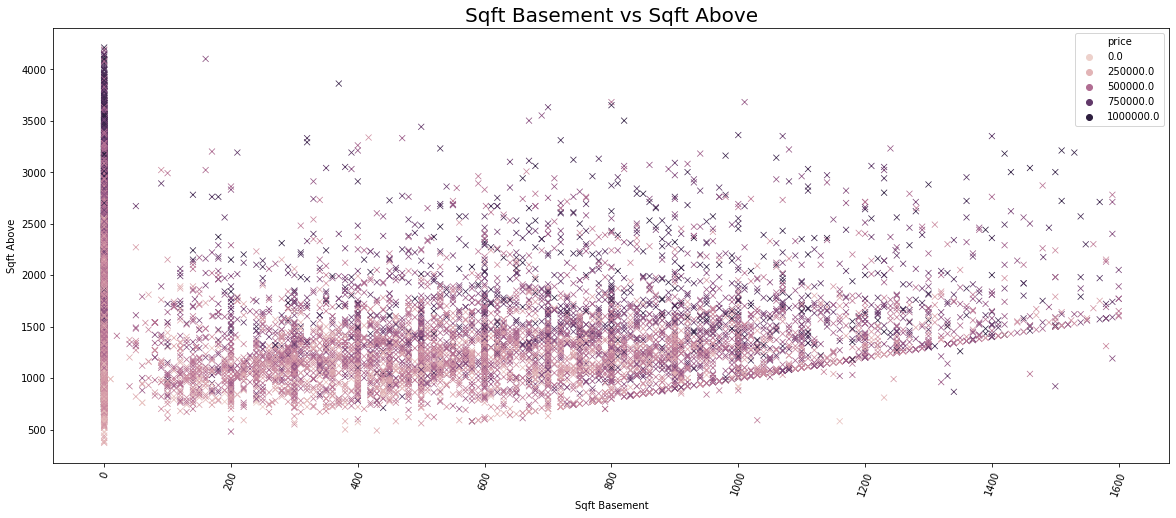

In [39]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='sqft_basement', y='sqft_above', data=df, marker='x', hue='price')
plt.title('Sqft Basement vs Sqft Above', fontsize=20)
plt.xlabel("Sqft Basement")
plt.ylabel('Sqft Above')
plt.xticks(rotation=70)
plt.show()

# Question 4 (Visuals) sqft_lot and sqft_above

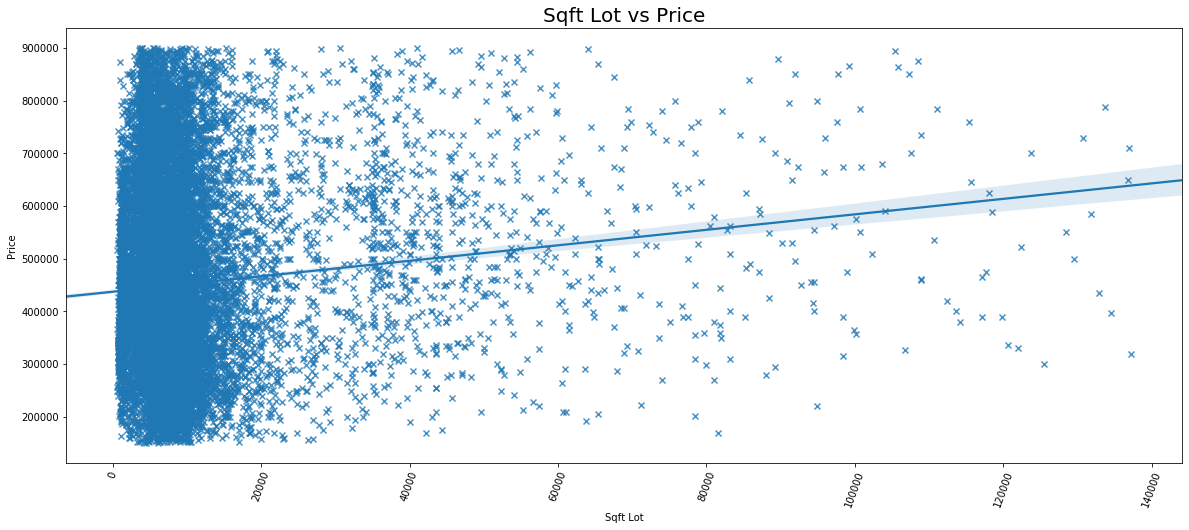

In [47]:
plt.figure(figsize=(20,8))
sns.regplot(x='sqft_lot', y='price', data=df, marker='x')
plt.title('Sqft Lot vs Price', fontsize=20)
plt.xlabel("Sqft Lot")
plt.ylabel('Price')
plt.xticks(rotation=70)
plt.show()

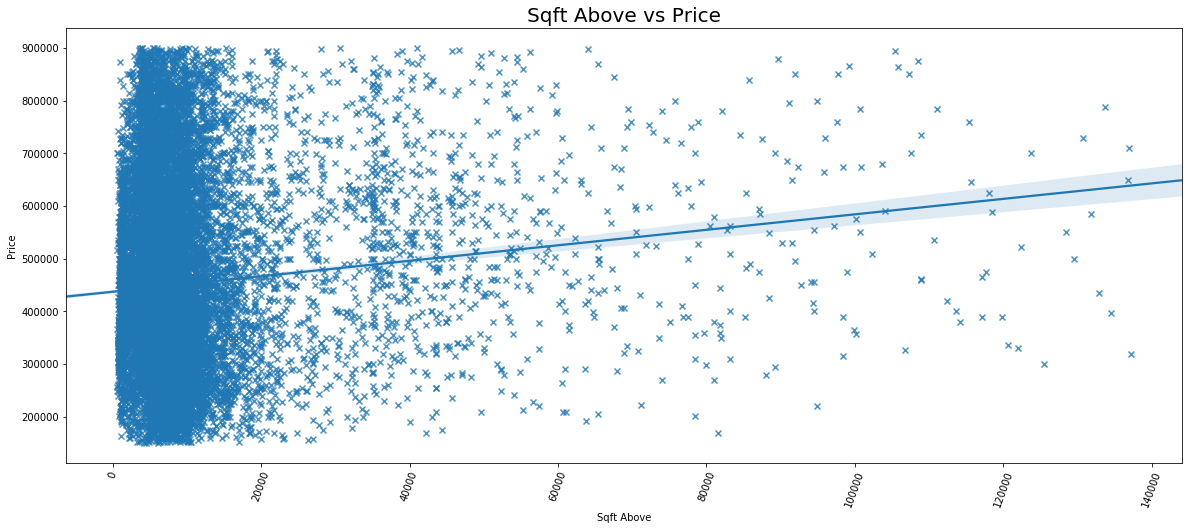

In [46]:
plt.figure(figsize=(20,8))
sns.regplot(x='sqft_lot', y='price', data=df, marker='x')
plt.title('Sqft Above vs Price', fontsize=20)
plt.xlabel("Sqft Above")
plt.ylabel('Price')
plt.xticks(rotation=70)
plt.show()

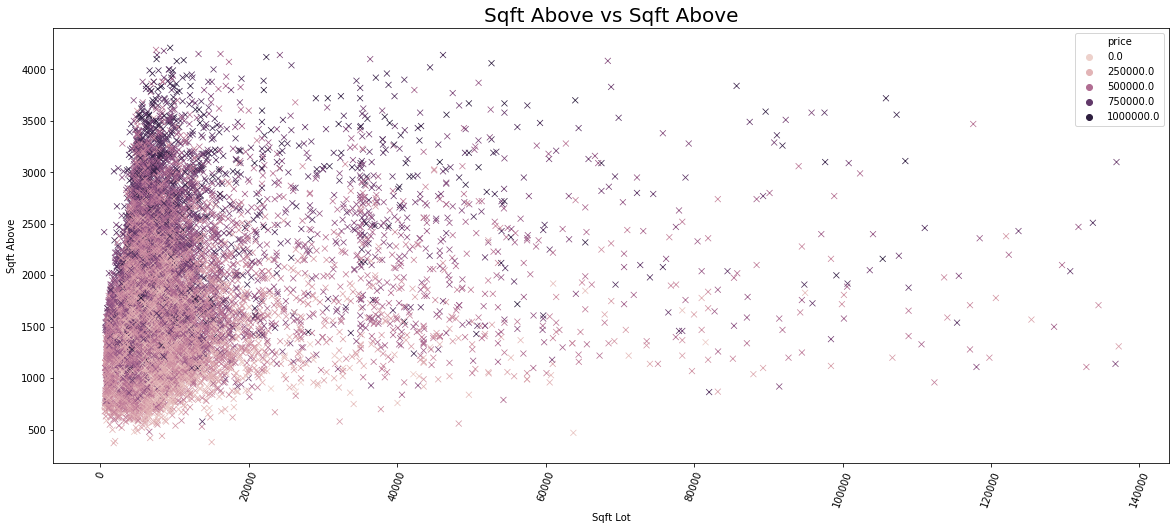

In [45]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='sqft_lot', y='sqft_above', data=df, marker='x', hue='price')
plt.title('Sqft Above vs Sqft Above', fontsize=20)
plt.xlabel("Sqft Lot")
plt.ylabel('Sqft Above')
plt.xticks(rotation=70)
plt.show()

# Question 5 (Visuals) yrbuilt/condition/months

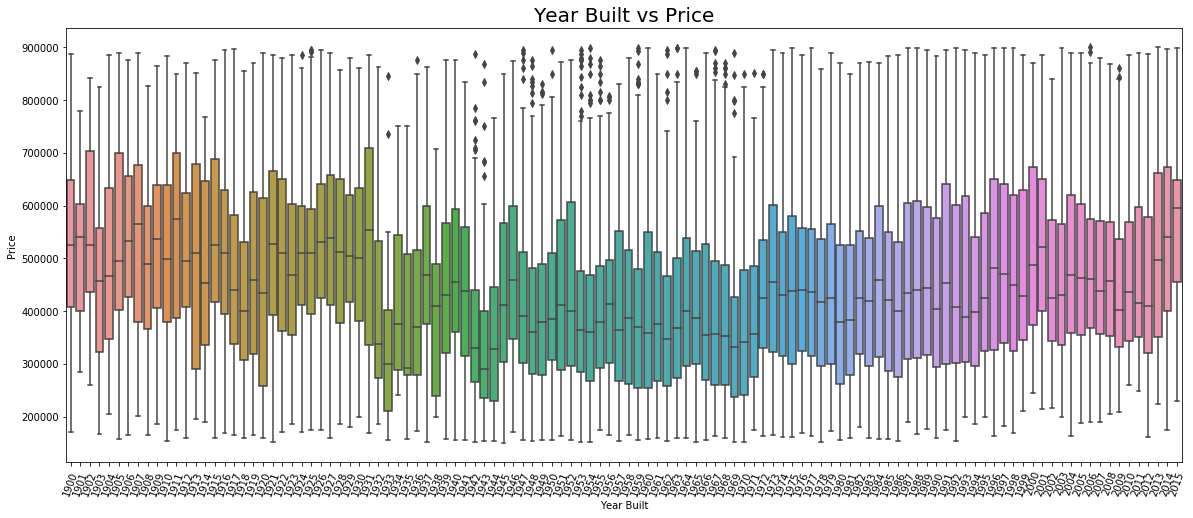

In [54]:
plt.figure(figsize=(20,8))
sns.boxplot(x='yr_built', y='price', data=df)
plt.title('Year Built vs Price', fontsize=20)
plt.xlabel("Year Built")
plt.ylabel('Price')
plt.xticks(rotation=70)
plt.show()

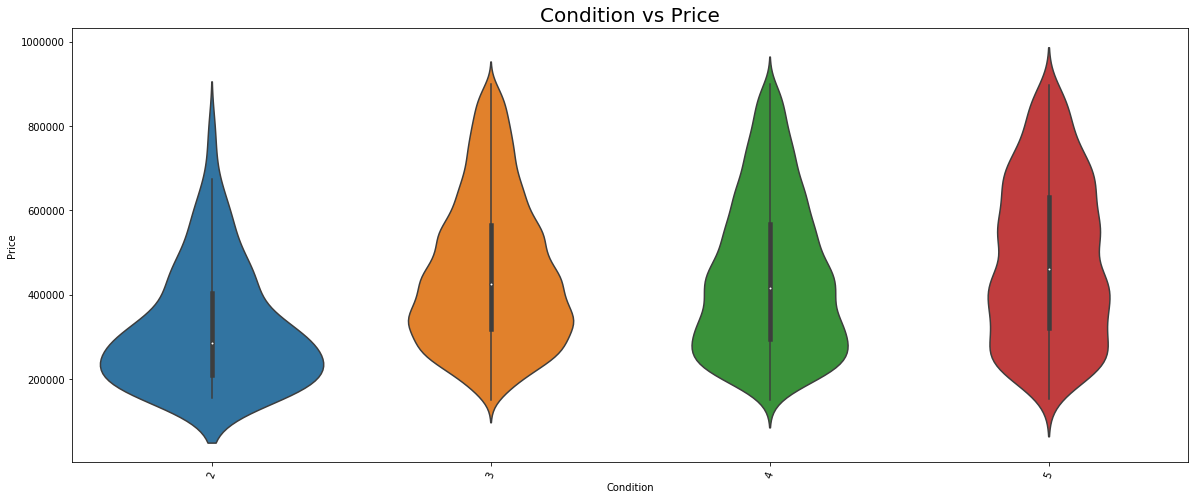

In [57]:
plt.figure(figsize=(20,8))
sns.violinplot(x='condition', y='price', data=df)
plt.title('Condition vs Price', fontsize=20)
plt.xlabel("Condition")
plt.ylabel('Price')
plt.xticks(rotation=70)
plt.show()

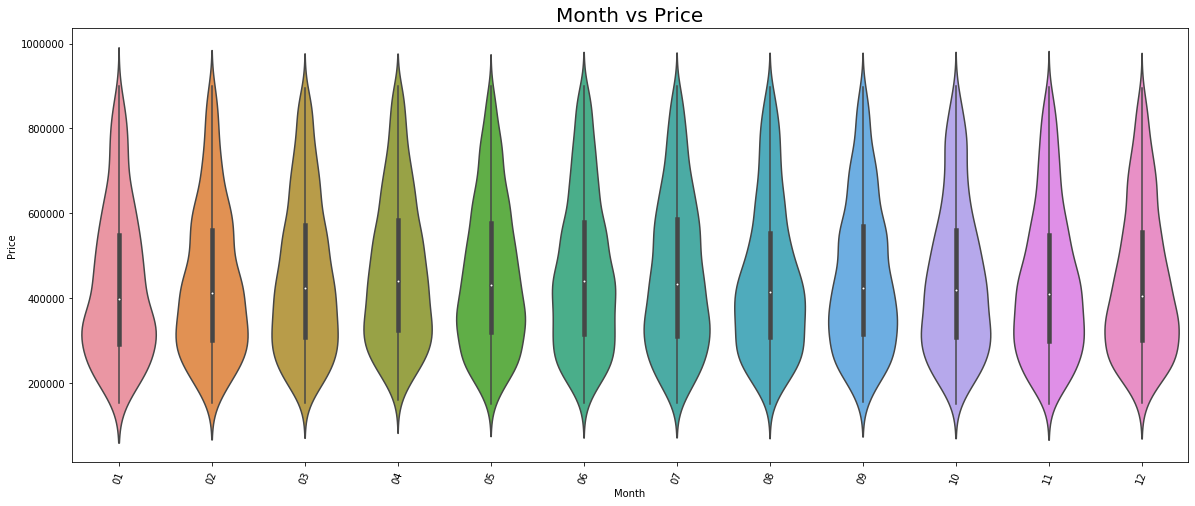

In [60]:
plt.figure(figsize=(20,8))
sns.violinplot(x='month', y='price', data=df)
plt.title('Month vs Price', fontsize=20)
plt.xlabel("Month")
plt.ylabel('Price')
plt.xticks(rotation=70)
plt.show()

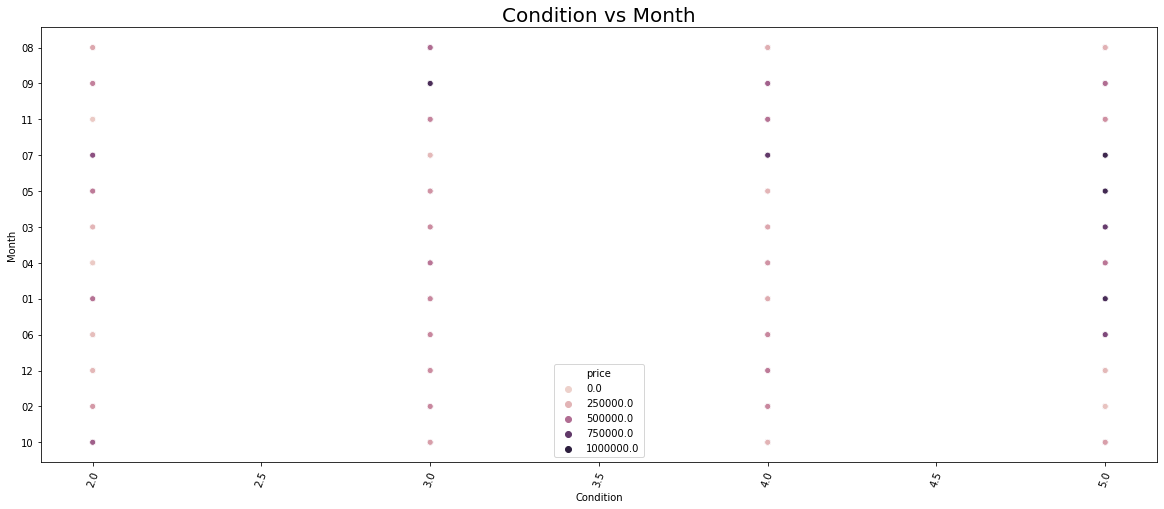

In [67]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='condition', y='month', data=df, hue='price')
plt.title('Condition vs Month', fontsize=20)
plt.xlabel("Condition")
plt.ylabel('Month')
plt.xticks(rotation=70)
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='condition', y='month', data=df, hue='price')
plt.title('Condition vs Month', fontsize=20)
plt.xlabel("Condition")
plt.ylabel('Month')
plt.xticks(rotation=70)
plt.show()

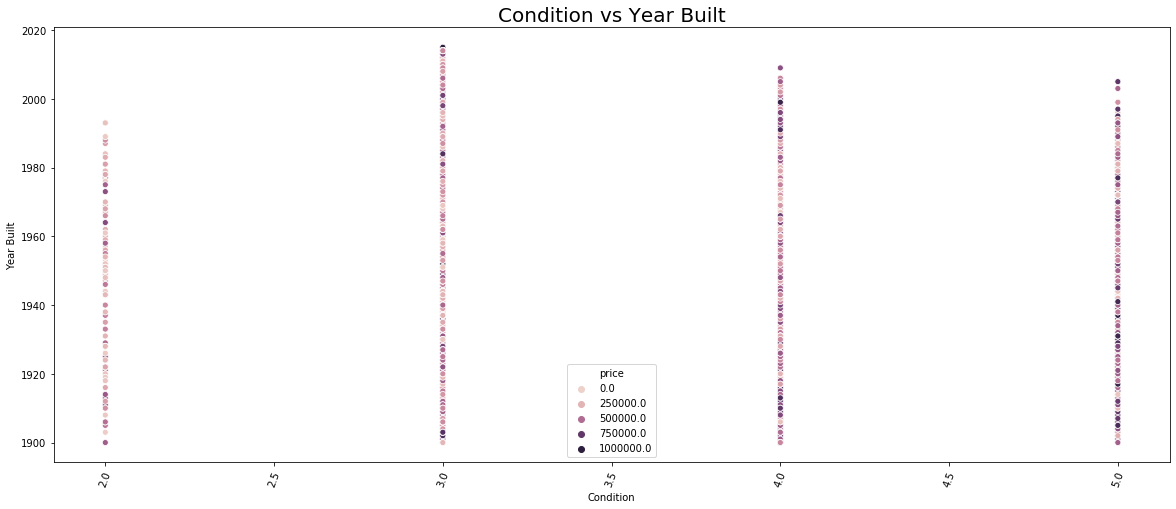

In [69]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='condition', y='yr_built', data=df, hue='price')
plt.title('Condition vs Year Built', fontsize=20)
plt.xlabel("Condition")
plt.ylabel('Year Built')
plt.xticks(rotation=70)
plt.show()

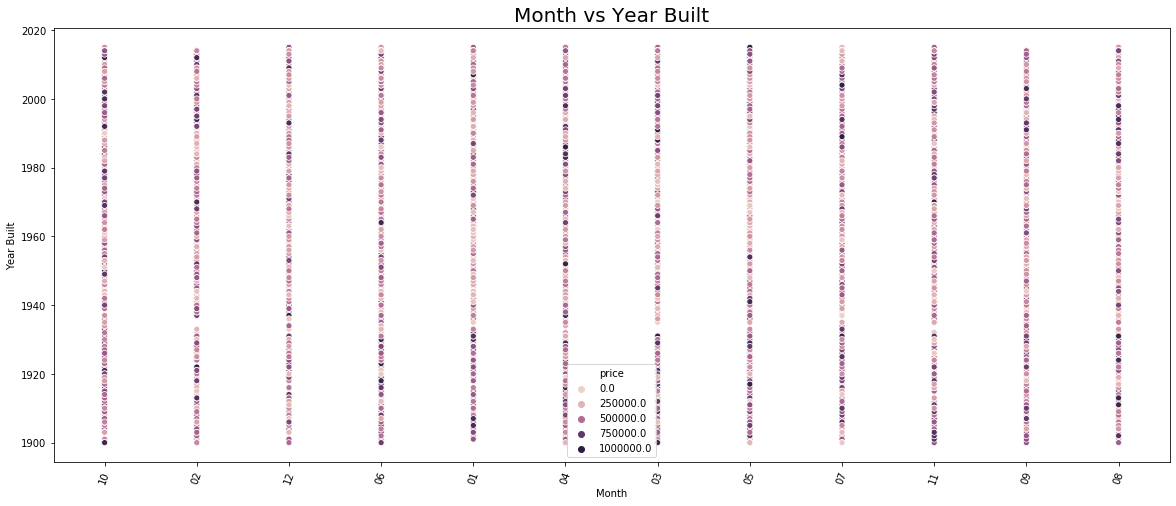

In [71]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='month', y='yr_built', data=df, hue='price')
plt.title('Month vs Year Built', fontsize=20)
plt.xlabel("Month")
plt.ylabel('Year Built')
plt.xticks(rotation=70)
plt.show()